### Integración de la ecuación del calor en una barra unidimensional
- py-pde https://py-pde.readthedocs.io/
- Manual de py-pde: https://py-pde.readthedocs.io/_/downloads/en/latest/pdf/
- Condiciones de contorno: https://py-pde.readthedocs.io/en/latest/manual/advanced_usage.html#boundary-conditions
- Código basado en: https://py-pde.readthedocs.io/en/latest/examples_gallery/pde_1d_expression.html


In [ ]:
# Instalo paquete necesario
!pip install py-pde

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 1.8 MB/s eta 0:00:00


In [ ]:
%%time
from math import pi
import matplotlib.pyplot as plt
from pde import PDE, CartesianGrid, MemoryStorage, ScalarField, plot_kymograph
import numpy as np


# defino condiciones de contorno
bc_x_left = {"derivative": "1"} # entrada de calor constante
# bc_x_left = {"derivative_expression": "(1+sin(3*t))*0.01"} # entrada de calor dependiente del tiempo
bc_x_right = {"value": "0"} # temperatura fija
# bc_x_right = {"value_expression": "sin(t)"} # temperatura dependiente del tiempo
bc_x = [bc_x_left, bc_x_right]

# Inicializo la ecuación diferencial
eq = PDE({"φ": f"laplace(φ)"}, bc=[bc_x]) # La ecuación diferencial

# Armo la grilla espacial
rango_x = [0, 1]
grilla_x = 10
grid = CartesianGrid([rango_x], [grilla_x]) # grilla espacial

# Condiciones iniciales
state = ScalarField.from_expression(grid, "0") # Condiciones iniciales 0
# state = ScalarField.from_expression(grid, "sin(x)") # Condiciones iniciales sinusoidal

# solve the equation and store the trajectory
t_range = 1
t_step = 0.1
storage = MemoryStorage()
eq.solve(state, t_range=t_range, tracker=storage.tracker(t_step), dt=1e-3)
print('Listo')

Listo
CPU times: user 6.61 s, sys: 30.8 ms, total: 6.64 s
Wall time: 7 s


In [ ]:
rango_x = [0, 440]
grilla_x = 11
grid = CartesianGrid([rango_x], [grilla_x]) # grilla espacial

grid.coordinate_arrays[0]

array([ 20.,  60., 100., 140., 180., 220., 260., 300., 340., 380., 420.])

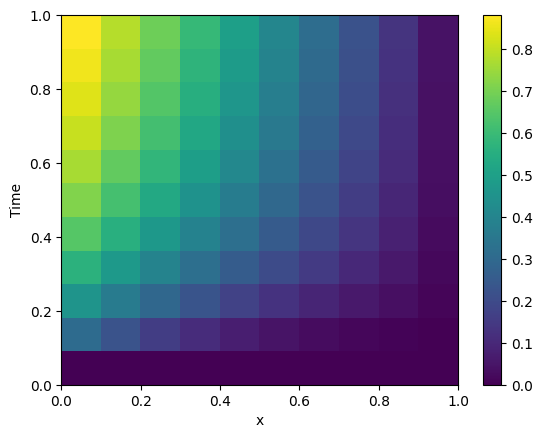

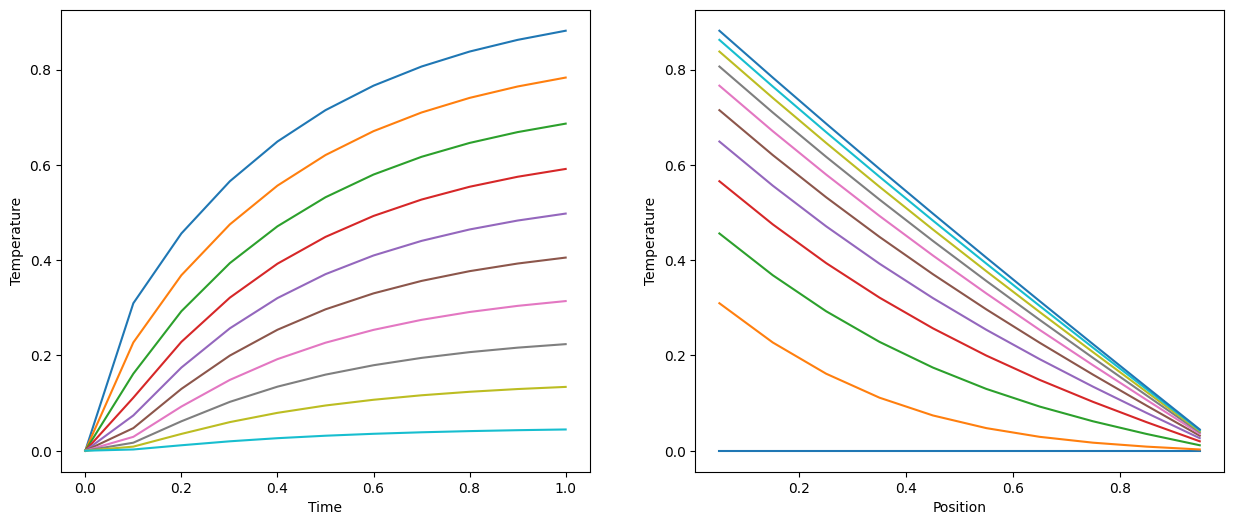

In [ ]:
# plot the trajectory as a space-time plot
plot_kymograph(storage)

# Extraigo los datos para graficar
data =  np.vstack(storage.data)
x = storage.grid.coordinate_arrays[0]
t = storage.times

#Algunos plots
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(t,data)
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.subplot(1,2,2)
plt.plot(x, data.T)
plt.xlabel('Position')
plt.ylabel('Temperature')
plt.show()

In [ ]:
storage.data

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([2.91653229e-01, 1.86063107e-01, 1.11643667e-01, 6.28215933e-02,
        3.30825807e-02, 1.62846340e-02, 7.48900304e-03, 3.21785314e-03,
        1.29249178e-03, 4.85709605e-04, 1.70955802e-04, 5.64272782e-05,
        1.74893841e-05, 5.09734309e-06, 1.39896666e-06, 3.62051591e-07,
        8.84760809e-08, 2.04431632e-08, 4.47187552e-09, 9.27212190e-10,
        1.82439710e-10, 3.41025990e-11, 6.06225983e-12, 1.02585526e-12,
        1.65402715e-13, 2.54319995e-14, 3.73209488e-15, 5.23105974e-16,
        7.00810408e-17, 8.97994540e-18, 1.10122958e-18, 1.29319178e-19,
        1.45499245e-20, 1.56922725e-21, 1.62306617e-22, 1.61062325e-23,
        1.53400160e-24, 1.40276124e-25, 1.23198527e-26, 1.03947723e-27,
        8.42796289e-29, 6.56788898e-30, 4.92049901e-31

In [ ]:
dir(storage)
# storage.times
# dir(storage.grid)
# storage.grid.coordinate_arrays[0]

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_append_data',
 '_data_shape',
 '_dtype',
 '_field',
 '_get_field',
 '_grid',
 '_init_field',
 '_logger',
 'append',
 'apply',
 'clear',
 'copy',
 'data',
 'data_shape',
 'dtype',
 'end_writing',
 'extract_field',
 'extract_time_range',
 'from_collection',
 'from_fields',
 'grid',
 'has_collection',
 'info',
 'items',
 'shape',
 'start_writing',
 'times',
 'tracker',
 'write_mode']